a_initial=  0.000499529037392177
Evolving from  1.7344758242783923e+20  to  1.0 r_isco  with initial eccentricity 0.999999499999875  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08


/home/pratibhajangra/Desktop/Work/imripy-main/src/imripy/inspiral.py:534: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  t_coal = t_coal * 48./19. / g(e_0)**4 * quad(lambda e: g(e)**4 *(1-e**2)**(5./2.) /e/(1. + 121./304. * e**2), 0., e_0, limit=100)[0]   # The inspiral time according to Maggiore (2007)
/home/pratibhajangra/Desktop/Work/imripy-main/src/imripy/inspiral.py:335: RuntimeWarning: invalid value encountered in sqrt
  v_s = np.sqrt(sp.m_total(a) *(2./r - 1./a))
/home/pratibhajangra/Desktop/Work/imripy-main/src/imripy/halo.py:321: RuntimeWarning: invalid value encountered in double_scalars
  return np.where(r > self.r_min, self.rho_spike * (self.r_spike/r)**self.alpha, 0.)
/home/pratibhajangra/Desktop/Work/imripy-main/src/imripy/inspiral.py:337: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return -(1.-e**2)**(3./2.)/2./np.pi

Required step size is less than spacing between numbers.
 -> Evolution took 3.0997s
here
Evolving from  1.7344758242783923e+20  to  1.0 r_isco  with initial eccentricity 0.9999992850151702  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 3.5698s
here
Evolving from  1.7344758242783923e+20  to  1.0 r_isco  with initial eccentricity 0.9999989775935948  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 3.8288s
here
Evolving from  1.7344758242783923e+20  to  1.0 r_isco  with initial eccentricity 0.9999985379900622  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 3.1036s
here
Evolving from  1.7344758242783923e+20  to  1.0 r_isco  with initial eccentric

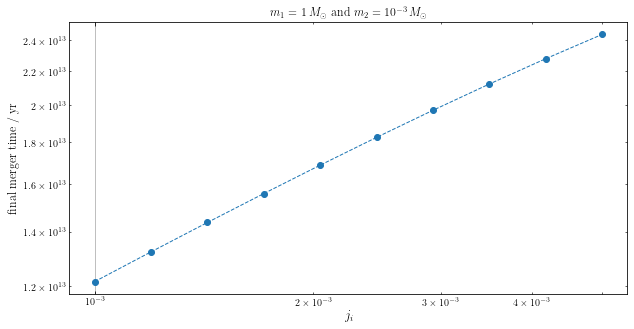

In [13]:
# Final merger time for the reference systems as a function of the initial 
# angular momentum j0 for binaries with DM halos having Power Law PDF 
# in the PBH  mass range of 5 - 100 solar mass.

import numpy as np
import matplotlib.pyplot as plt
import imripy
from imripy import merger_system as ms
from scipy.interpolate import interp1d
from matplotlib.ticker import FormatStrFormatter
from scipy.optimize import curve_fit
from numpy import diff

plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})



π = np.pi
G = 4.4959e-15            #in units of M☉^-1 pc^3 yr^-2
c = 0.3068                #in units of pc yr^-1
ρ_eq = 3.1812e3           #in units of M☉ pc^-3 with ρ_eq=2.15368e-16 kg m^-3
t_m = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr
yr = 3.154e7              # in units of seconds
t_eq = 1.59246e12/yr      # in units of yr
M_solar = 1.989e30


# Definition of the reference binary system with m_1 = 1 M☉ and m_2 = 1e-3 M☉.
bin_centres = np.geomspace(1e-3, 1, 5)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])


ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 


deltas = np.diff(bin_edges)
Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()

m_1 = np.geomspace(1e-3, 1, 5)
m_2 = np.geomspace(1e-3, 1, 5)
m_1_list = m_1.tolist()
m_2_list = m_2.tolist()   

    

    
def a(m_1,m_2,Δ_1,Δ_2):  # for x = x_bar 
    
    f_pbh = 7.94e-4
    f = 0.85 * f_pbh
        
          
    def P(m): #Powerlaw PBH mass distribution
        α = 1.6
        M = 5     #in units of M☉
        return ((α-1)/M) * ((m/M)**(-α))

    
    def f_(m):
        return f*P(m)
    
    def f_b(m_1,m_2):
        return  f_(m_1)+f_(m_2)
    
    def x̄(m_1,m_2,Δ_1,Δ_2):
        return (((3*(m_1+m_2))/(8*π*ρ_eq*f_b(m_1,m_2)*np.sqrt(Δ_1*Δ_2)))**(1/3))
   
    def λ(m_1,m_2,Δ_1,Δ_2):
        return (8*π*ρ_eq*(x̄(m_1,m_2,Δ_1,Δ_2)**3))/(3*(m_1 + m_2))

    
    return (0.0977*λ(m_1,m_2,Δ_1,Δ_2) + 0.0057*(λ(m_1,m_2,Δ_1,Δ_2)**2) ) * x̄(m_1,m_2,Δ_1,Δ_2)





a_initial = a(m_1_list[-1], m_2_list[0], Δ_1_list[-1], Δ_2_list[0])


print("a_initial= ", a_initial)


# Setting initial and final conditions of the binary evolution for an eccentric orbit
a_i_ref = a_initial * 1e11
j0_array = np.geomspace(1e-3, 5e-3, 10)
j0_ref_list_1 = j0_array.tolist()





plt.figure(figsize = (10, 5))
plt.rc('lines', linewidth=1)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(which='both', right=True, top=True)






tm_ref_list_1 = np.zeros(len(j0_ref_list_1))
T_list = np.zeros(len(j0_ref_list_1))


for k, j0 in enumerate (j0_ref_list_1):
    m_bar = 1
    m1 =  m_bar * ms.solar_mass_to_pc  
    m2 = 1e-3 * ms.solar_mass_to_pc   
    D_luminosity = 5e8              
    ρ_bar = (ρ_eq/2) * (t_eq**(3/2)) * ((2 * G * m_bar)**(3/4))   
    r_spike = 1  # in parsecs, Choosen by choice
    alpha = 9/4
    rho_spike =  ρ_bar * (r_spike**(-alpha)) * ms.solar_mass_to_pc  
    spike = imripy.halo.Spike(rho_spike, r_spike, alpha)
    sp = ms.SystemProp(m1, m2, spike, D_luminosity)
    a_fin = sp.r_isco()      # Choosen equal to r_icso
    R_fin = sp.r_isco()      # The final condition for the evolution
    e0 = np.sqrt(1 -(j0**2))
    
    
    m_2_ref = 1 # in units of solar mass
    T = 1e-5 * (t_m * ms.year_to_pc ) * ((m2/m_2_ref)**(-1))
    
    ev_ecc = imripy.inspiral.Classic.Evolve(sp, a_i_ref , e0,  a_fin = R_fin, t_fin = T)
    tm = ev_ecc.t[-1]
    
    print("here")
    while np.isclose(T, tm) == True: 
        T = T * 1000
        ev_ecc = imripy.inspiral.Classic.Evolve(sp, a_i_ref, e0,  a_fin = R_fin, t_fin = T)
        tm = ev_ecc.t[-1]
        
            
            
    tm_ref_list_1[k] = tm/ms.year_to_pc
    T_list[k] =  T/ms.year_to_pc
      
    
   
   
    
    np.savez("tmofjo_1_PWRhalo_1",  j0_ref_list_1,  tm_ref_list_1)

    
    
plt.loglog(j0_ref_list_1, tm_ref_list_1, '--o')


print(tm_ref_list_1)
    

plt.xlabel('$j_{i}$', fontsize = 13)
plt.ylabel('final merger time / yr', fontsize = 12)
plt.title('$m_{1} = 1 \, M_{\odot}$ and $m_{2}= 10^{-3} \,  M_{\odot}$ ')
plt.grid()
plt.show()

a_initial=  0.000499529037392177
Evolving from  1.7344758242783923e+20  to  1.0 r_isco  with initial eccentricity 0.9999869949154339  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08


/home/pratibhajangra/Desktop/Work/imripy-main/src/imripy/inspiral.py:335: RuntimeWarning: invalid value encountered in sqrt
  v_s = np.sqrt(sp.m_total(a) *(2./r - 1./a))
/home/pratibhajangra/Desktop/Work/imripy-main/src/imripy/halo.py:321: RuntimeWarning: invalid value encountered in double_scalars
  return np.where(r > self.r_min, self.rho_spike * (self.r_spike/r)**self.alpha, 0.)
/home/pratibhajangra/Desktop/Work/imripy-main/src/imripy/inspiral.py:337: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return -(1.-e**2)**(3./2.)/2./np.pi * quad(integrand, 0., 2.*np.pi, limit = 100)[0]
/home/pratibhajangra/Desktop/Work/imripy-main/src/imripy/inspiral.py:172: RuntimeWarning: invalid value encountered in double_scalars
  return -32./5. * sp.m_reduced(a)**2 * sp.m_total(a)**(5./2.) / a**(7./2.)  / (1. - e**2)**2 * (1. + 7./8.*e**2)
/home/pratibhajangra/Desktop/Work/imripy-

Required step size is less than spacing between numbers.
 -> Evolution took 3.2827s
here
Evolving from  1.7344758242783923e+20  to  1.0 r_isco  with initial eccentricity 0.9999579710700719  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 2.9722s
here
Evolving from  1.7344758242783923e+20  to  1.0 r_isco  with initial eccentricity 0.9998641694208956  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 3.4164s
here
Evolving from  1.7344758242783923e+20  to  1.0 r_isco  with initial eccentricity 0.9995609719689087  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 3.7410s
here
Evolving from  1.7344758242783923e+20  to  1.0 r_isco  with initial eccentric

/home/pratibhajangra/Desktop/Work/imripy-main/src/imripy/merger_system.py:202: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((self.mass(r) + self.m2)/r**3)
/tmp/ipykernel_114300/832971616.py:134: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbon_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('tm_refvsj_i_ref.pdf', bbon_inches = 'tight')


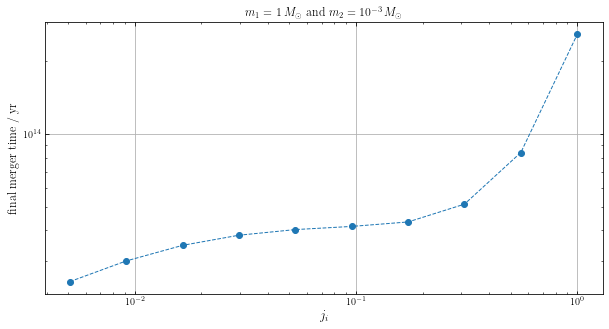

In [14]:
# Definition of the reference binary system with m_1 = 1 M☉ and m_2 = 1e-3 M☉.
bin_centres = np.geomspace(1e-3, 1, 5)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])


ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 


deltas = np.diff(bin_edges)
Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()

m_1 = np.geomspace(1e-3, 1, 5)
m_2 = np.geomspace(1e-3, 1, 5)
m_1_list = m_1.tolist()
m_2_list = m_2.tolist()   
   

    
def a(m_1,m_2,Δ_1,Δ_2):  # for x = x_bar 
    
    f_pbh = 7.94e-4
    f = 0.85 * f_pbh
        
          
    def P(m): #Powerlaw PBH mass distribution
        α = 1.6
        M = 5     #in units of M☉
        return ((α-1)/M) * ((m/M)**(-α))

    
    def f_(m):
        return f*P(m)
    
    def f_b(m_1,m_2):
        return  f_(m_1)+f_(m_2)
    
    def x̄(m_1,m_2,Δ_1,Δ_2):
        return (((3*(m_1+m_2))/(8*π*ρ_eq*f_b(m_1,m_2)*np.sqrt(Δ_1*Δ_2)))**(1/3))
   
    def λ(m_1,m_2,Δ_1,Δ_2):
        return (8*π*ρ_eq*(x̄(m_1,m_2,Δ_1,Δ_2)**3))/(3*(m_1 + m_2))

    
    return (0.0977*λ(m_1,m_2,Δ_1,Δ_2) + 0.0057*(λ(m_1,m_2,Δ_1,Δ_2)**2) ) * x̄(m_1,m_2,Δ_1,Δ_2)





a_initial = a(m_1_list[-1], m_2_list[0], Δ_1_list[-1], Δ_2_list[0])


print("a_initial= ", a_initial)


# Setting initial and final conditions of the binary evolution for an eccentric orbit
a_i_ref = a_initial * 1e11
j0_array = np.geomspace(5.1e-3, 1, 10)
j0_ref_list_2 = j0_array.tolist()





plt.figure(figsize = (10, 5))
plt.rc('lines', linewidth=1)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(which='both', right=True, top=True)






tm_ref_list_2 = np.zeros(len(j0_ref_list_2))
T_list = np.zeros(len(j0_ref_list_2))


for k, j0 in enumerate (j0_ref_list_2):
    m_bar = 1
    m1 =  m_bar * ms.solar_mass_to_pc  
    m2 = 1e-3 * ms.solar_mass_to_pc   
    D_luminosity = 5e8              
    ρ_bar = (ρ_eq/2) * (t_eq**(3/2)) * ((2 * G * m_bar)**(3/4))   
    r_spike = 1  # in parsecs, Choosen by choice
    alpha = 9/4
    rho_spike =  ρ_bar * (r_spike**(-alpha)) * ms.solar_mass_to_pc  
    spike = imripy.halo.Spike(rho_spike, r_spike, alpha)
    sp = ms.SystemProp(m1, m2, spike, D_luminosity)
    a_fin = sp.r_isco()      # Choosen equal to r_icso
    R_fin = sp.r_isco()      # The final condition for the evolution
    e0 = np.sqrt(1 -(j0**2))
    
    
    m_2_ref = 1 # in units of solar mass
    T = 1e-5 * (t_m * ms.year_to_pc ) * ((m2/m_2_ref)**(-1))
    
    ev_ecc = imripy.inspiral.Classic.Evolve(sp, a_i_ref , e0,  a_fin = R_fin, t_fin = T)
    tm = ev_ecc.t[-1]
    
    print("here")
    while np.isclose(T, tm) == True: 
        T = T * 1000
        ev_ecc = imripy.inspiral.Classic.Evolve(sp, a_i_ref, e0,  a_fin = R_fin, t_fin = T)
        tm = ev_ecc.t[-1]
        
            
            
    tm_ref_list_2[k] = tm/ms.year_to_pc
    T_list[k] =  T/ms.year_to_pc
      
    
   
   
    
    np.savez("tmofjo_2_PWRhalo_1",  j0_ref_list_2,  tm_ref_list_2)

    
    
plt.loglog(j0_ref_list_2, tm_ref_list_2, '--o')


print(tm_ref_list_2)
    

plt.xlabel('$j_{i}$', fontsize = 13)
plt.ylabel('final merger time / yr', fontsize = 12)
plt.title('$m_{1} = 1 \, M_{\odot}$ and $m_{2}= 10^{-3} \,  M_{\odot}$ ')
plt.grid()
plt.savefig('tm_refvsj_i_ref.pdf', bbon_inches = 'tight')
plt.show()

Slope and intercept of fitting function = [ 0.46493127 33.34113357]


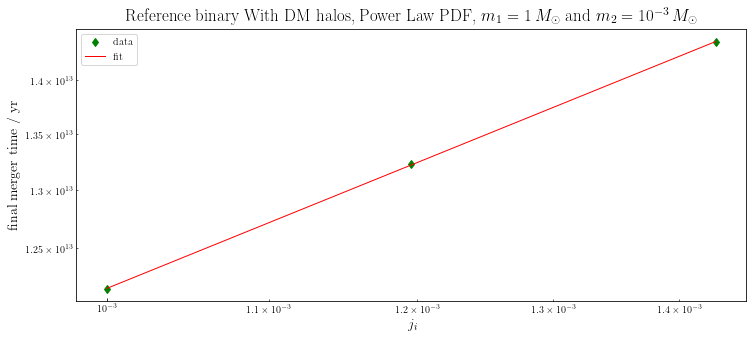

In [15]:
plt.figure(figsize = (12, 5))

x  = (j0_ref_list_1[0], j0_ref_list_1[1], j0_ref_list_1[2] )
y  = (tm_ref_list_1[0], tm_ref_list_1[1], tm_ref_list_1[2])

plt.loglog(x,y,'gd',  label='data')

p = np.polyfit(np.log(x),np.log(y),1)  # F(x) = (x**m)(10**b) with m = slope, b = intercept.
z = np.polyval(p,np.log(x))
plt.loglog(x, np.exp(z), 'r',  label='fit')
print("Slope and intercept of fitting function =", p) 

plt.xlabel('$j_{i}$', fontsize = 14)
plt.ylabel('final merger time / yr', fontsize = 14)
plt.title('Reference binary With DM halos, Power Law PDF, $m_{1} = 1 \, M_{\odot}$ and $m_{2}= 10^{-3} \,  M_{\odot}$ ', fontsize = 17, pad = 9)
plt.legend()
plt.savefig('1hPWRextrapolate.pdf', bbox_inches = 'tight')
plt.show()


# So, the fitting function is t_final_mergertime = (10**33.34) * (j0**0.465) 


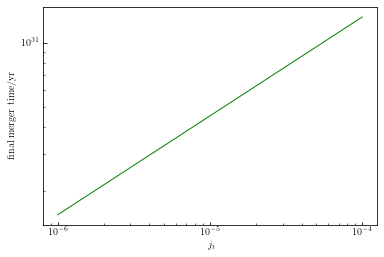

j0_lower_values = [1e-06, 1.6681005372000591e-06, 2.782559402207126e-06, 4.641588833612782e-06, 7.742636826811277e-06, 1.2915496650148827e-05, 2.1544346900318823e-05, 3.5938136638046256e-05, 5.994842503189409e-05, 0.0001]

final merger time / yr = [1.54881662e+30 1.96486779e+30 2.49268079e+30 3.16227766e+30
 4.01174512e+30 5.08940095e+30 6.45654229e+30 8.19093224e+30
 1.03912230e+31 1.31825674e+31]


In [16]:
j0_array_3 = np.geomspace(1e-6, 1e-4, 10)

j0_ref_list_3 = j0_array_3.tolist()

def t_final_merger(j0):
    return  (10**32.98) * (j0**0.465) 
    
tm_ref_list_3 = np.zeros(len(j0_ref_list_3))

for i, j0 in enumerate(j0_ref_list_3):
    tm_ref_list_3[i] = t_final_merger(j0)
    

    
    

plt.loglog(j0_ref_list_3, tm_ref_list_3, 'g')
plt.xlabel('$j_{i}$')
plt.ylabel('final merger time/yr')
plt.show()


print("j0_lower_values =", j0_ref_list_3)
print('\v')
print("final merger time / yr =", tm_ref_list_3)


file = np.load('tmofjo_1_PWRhalo_1.npz')
ji_ref_list_1 = file['arr_0']
tm_ref_list_1 = file['arr_1']


file = np.load('tmofjo_2_PWRhalo_1.npz')
ji_ref_list_2 = file['arr_0']
tm_ref_list_2 = file['arr_1']



j_initial_list = j0_ref_list_1 + j0_ref_list_2 + j0_ref_list_3


t_1 =  np.append(tm_ref_list_1, tm_ref_list_2) 

t_final_list = np.append(t_1, tm_ref_list_3 )

a_initial=   4.9952e-4 # in units of pc


a_i_ref_PWRhalo_1 = a_initial * 1e11

np.savez("tm_ofj0_PWRhalo_1", a_i_ref_PWRhalo_1, j_initial_list,  t_final_list)

a_initial=  4.5182439078142854e+17
Evolving from  1.5688346902132937e+30  to  1.0 r_isco  with initial eccentricity 0.999999499999875  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08


/home/pratibhajangra/Desktop/Work/imripy-main/src/imripy/inspiral.py:534: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  t_coal = t_coal * 48./19. / g(e_0)**4 * quad(lambda e: g(e)**4 *(1-e**2)**(5./2.) /e/(1. + 121./304. * e**2), 0., e_0, limit=100)[0]   # The inspiral time according to Maggiore (2007)
/home/pratibhajangra/Desktop/Work/imripy-main/src/imripy/inspiral.py:335: RuntimeWarning: invalid value encountered in sqrt
  v_s = np.sqrt(sp.m_total(a) *(2./r - 1./a))
/home/pratibhajangra/Desktop/Work/imripy-main/src/imripy/halo.py:321: RuntimeWarning: invalid value encountered in double_scalars
  return np.where(r > self.r_min, self.rho_spike * (self.r_spike/r)**self.alpha, 0.)
/home/pratibhajangra/Desktop/Work/imripy-main/src/imripy/inspiral.py:337: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return -(1.-e**2)**(3./2.)/2./np.pi

Required step size is less than spacing between numbers.
 -> Evolution took 4.5289s
here
Evolving from  1.5688346902132937e+30  to  1.0 r_isco  with initial eccentricity 0.9999992850151702  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 4.2761s
here
Evolving from  1.5688346902132937e+30  to  1.0 r_isco  with initial eccentricity 0.9999989775935948  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 4.3253s
here
Evolving from  1.5688346902132937e+30  to  1.0 r_isco  with initial eccentricity 0.9999985379900622  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 3.9461s
here
Evolving from  1.5688346902132937e+30  to  1.0 r_isco  with initial eccentric

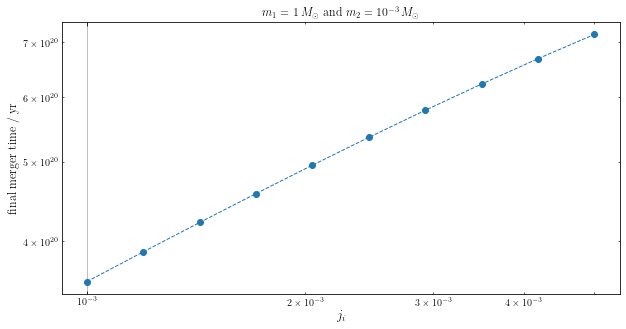

In [29]:
# Final merger time for the reference systems as a function of the initial 
# angular momentum j0 for binaries with DM halos having Lognormal PDF 
# in the PBH  mass range of 5 - 100 solar mass.


# Definition of the reference binary system with m_1 = 1 M☉ and m_2 = 1e-3 M☉.
bin_centres = np.geomspace(1e-3, 1, 5)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])


ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 


deltas = np.diff(bin_edges)
Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()

m_1 = np.geomspace(1e-3, 1, 5)
m_2 = np.geomspace(1e-3, 1, 5)
m_1_list = m_1.tolist()
m_2_list = m_2.tolist()   


    
def a(m_1,m_2,Δ_1,Δ_2):  # for x = x_bar 
    
    f_pbh = 5.26e-4
    f = 0.85 * f_pbh
        
          
    def P(m):                  #Log-Normal PBH mass Distribution
        σ = 0.6
        m_c = 15               #in units of M☉, for PBHs mass range of m_min = 5 M☉ - m_max = 100 M☉ .
        return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-(((np.log(m/m_c))**2)/(2*(σ**2))))

    
    def f_(m):
        return f*P(m)
    
    def f_b(m_1,m_2):
        return  f_(m_1)+f_(m_2)
    
    def x̄(m_1,m_2,Δ_1,Δ_2):
        return (((3*(m_1+m_2))/(8*π*ρ_eq*f_b(m_1,m_2)*np.sqrt(Δ_1*Δ_2)))**(1/3))
   
    def λ(m_1,m_2,Δ_1,Δ_2):
        return (8*π*ρ_eq*(x̄(m_1,m_2,Δ_1,Δ_2)**3))/(3*(m_1 + m_2))

    
    return (0.0977*λ(m_1,m_2,Δ_1,Δ_2) + 0.0057*(λ(m_1,m_2,Δ_1,Δ_2)**2) ) * x̄(m_1,m_2,Δ_1,Δ_2)





a_initial = a(m_1_list[-1], m_2_list[0], Δ_1_list[-1], Δ_2_list[0])


print("a_initial= ", a_initial)


# Setting initial and final conditions of the binary evolution for an eccentric orbit
a_i_ref = a_initial 
j0_array = np.geomspace(1e-3, 5e-3, 10)
j0_ref_list_1 = j0_array.tolist()





plt.figure(figsize = (10, 5))
plt.rc('lines', linewidth=1)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(which='both', right=True, top=True)






tm_ref_list_1 = np.zeros(len(j0_ref_list_1))
T_list = np.zeros(len(j0_ref_list_1))


for k, j0 in enumerate (j0_ref_list_1):
    m_bar = 1
    m1 =  m_bar * ms.solar_mass_to_pc  
    m2 = 1e-3 * ms.solar_mass_to_pc   
    D_luminosity = 5e8              
    ρ_bar = (ρ_eq/2) * (t_eq**(3/2)) * ((2 * G * m_bar)**(3/4))   
    r_spike = 1  # in parsecs, Choosen by choice
    alpha = 9/4
    rho_spike =  ρ_bar * (r_spike**(-alpha)) * ms.solar_mass_to_pc  
    spike = imripy.halo.Spike(rho_spike, r_spike, alpha)
    sp = ms.SystemProp(m1, m2, spike, D_luminosity)
    a_fin = sp.r_isco()      # Choosen equal to r_icso
    R_fin = sp.r_isco()      # The final condition for the evolution
    e0 = np.sqrt(1 -(j0**2))
    
    
    m_2_ref = 1 # in units of solar mass
    T = 1e-5 * (t_m * ms.year_to_pc ) * ((m2/m_2_ref)**(-1))
    
    ev_ecc = imripy.inspiral.Classic.Evolve(sp, a_i_ref , e0,  a_fin = R_fin, t_fin = T)
    tm = ev_ecc.t[-1]
    
    print("here")
    while np.isclose(T, tm) == True: 
        T = T * 1000
        ev_ecc = imripy.inspiral.Classic.Evolve(sp, a_i_ref, e0,  a_fin = R_fin, t_fin = T)
        tm = ev_ecc.t[-1]
        
            
            
    tm_ref_list_1[k] = tm/ms.year_to_pc
    T_list[k] =  T/ms.year_to_pc
      
    
   
   
    
    np.savez("tmofjo_1_Lgnmlhalo_1",  j0_ref_list_1,  tm_ref_list_1)

    
    
plt.loglog(j0_ref_list_1, tm_ref_list_1, '--o')


print(tm_ref_list_1)
    

plt.xlabel('$j_{i}$', fontsize = 13)
plt.ylabel('final merger time / yr', fontsize = 12)
plt.title('$m_{1} = 1 \, M_{\odot}$ and $m_{2}= 10^{-3} \,  M_{\odot}$ ')
plt.grid()
plt.show()

a_initial=  4.5182439078142854e+17
Evolving from  1.5688346902132937e+30  to  1.0 r_isco  with initial eccentricity 0.9999869949154339  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08


/home/pratibhajangra/Desktop/Work/imripy-main/src/imripy/inspiral.py:335: RuntimeWarning: invalid value encountered in sqrt
  v_s = np.sqrt(sp.m_total(a) *(2./r - 1./a))
/home/pratibhajangra/Desktop/Work/imripy-main/src/imripy/halo.py:321: RuntimeWarning: invalid value encountered in double_scalars
  return np.where(r > self.r_min, self.rho_spike * (self.r_spike/r)**self.alpha, 0.)
/home/pratibhajangra/Desktop/Work/imripy-main/src/imripy/inspiral.py:337: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return -(1.-e**2)**(3./2.)/2./np.pi * quad(integrand, 0., 2.*np.pi, limit = 100)[0]
/home/pratibhajangra/Desktop/Work/imripy-main/src/imripy/inspiral.py:172: RuntimeWarning: invalid value encountered in double_scalars
  return -32./5. * sp.m_reduced(a)**2 * sp.m_total(a)**(5./2.) / a**(7./2.)  / (1. - e**2)**2 * (1. + 7./8.*e**2)
/home/pratibhajangra/Desktop/Work/imripy-

Required step size is less than spacing between numbers.
 -> Evolution took 4.0364s
here
Evolving from  1.5688346902132937e+30  to  1.0 r_isco  with initial eccentricity 0.9999579710700719  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 4.0945s
here
Evolving from  1.5688346902132937e+30  to  1.0 r_isco  with initial eccentricity 0.9998641694208956  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 4.3775s
here
Evolving from  1.5688346902132937e+30  to  1.0 r_isco  with initial eccentricity 0.9995609719689087  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 4.1977s
here
Evolving from  1.5688346902132937e+30  to  1.0 r_isco  with initial eccentric

/home/pratibhajangra/Desktop/Work/imripy-main/src/imripy/merger_system.py:202: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((self.mass(r) + self.m2)/r**3)
/tmp/ipykernel_114300/1153474107.py:134: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbon_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('tm_refvsj_i_ref.pdf', bbon_inches = 'tight')


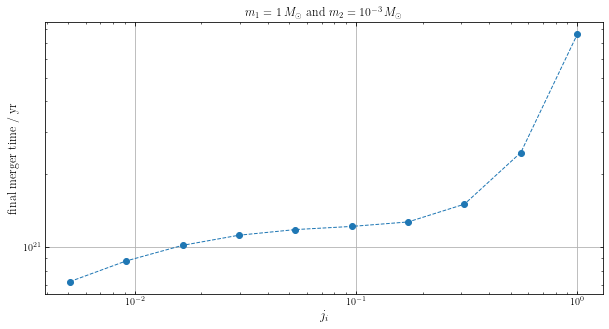

In [30]:
# Definition of the reference binary system with m_1 = 1 M☉ and m_2 = 1e-3 M☉.
bin_centres = np.geomspace(1e-3, 1, 5)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])


ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 


deltas = np.diff(bin_edges)
Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()

m_1 = np.geomspace(1e-3, 1, 5)
m_2 = np.geomspace(1e-3, 1, 5)
m_1_list = m_1.tolist()
m_2_list = m_2.tolist()   

  

def a(m_1,m_2,Δ_1,Δ_2):  # for x = x_bar 
    
    f_pbh = 5.26e-4
    f = 0.85 * f_pbh
        
          
    def P(m):                  #Log-Normal PBH mass Distribution
        σ = 0.6
        m_c = 15               #in units of M☉, for PBHs mass range of m_min = 5 M☉ - m_max = 100 M☉ .
        return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-(((np.log(m/m_c))**2)/(2*(σ**2))))

    
    def f_(m):
        return f*P(m)
    
    def f_b(m_1,m_2):
        return  f_(m_1)+f_(m_2)
    
    def x̄(m_1,m_2,Δ_1,Δ_2):
        return (((3*(m_1+m_2))/(8*π*ρ_eq*f_b(m_1,m_2)*np.sqrt(Δ_1*Δ_2)))**(1/3))
   
    def λ(m_1,m_2,Δ_1,Δ_2):
        return (8*π*ρ_eq*(x̄(m_1,m_2,Δ_1,Δ_2)**3))/(3*(m_1 + m_2))

    
    return (0.0977*λ(m_1,m_2,Δ_1,Δ_2) + 0.0057*(λ(m_1,m_2,Δ_1,Δ_2)**2) ) * x̄(m_1,m_2,Δ_1,Δ_2)





a_initial = a(m_1_list[-1], m_2_list[0], Δ_1_list[-1], Δ_2_list[0])


print("a_initial= ", a_initial)


# Setting initial and final conditions of the binary evolution for an eccentric orbit
a_i_ref = a_initial 
j0_array = np.geomspace(5.1e-3, 1, 10)
j0_ref_list_2 = j0_array.tolist()





plt.figure(figsize = (10, 5))
plt.rc('lines', linewidth=1)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(which='both', right=True, top=True)






tm_ref_list_2 = np.zeros(len(j0_ref_list_2))
T_list = np.zeros(len(j0_ref_list_2))


for k, j0 in enumerate (j0_ref_list_2):
    m_bar = 1
    m1 =  m_bar * ms.solar_mass_to_pc  
    m2 = 1e-3 * ms.solar_mass_to_pc   
    D_luminosity = 5e8              
    ρ_bar = (ρ_eq/2) * (t_eq**(3/2)) * ((2 * G * m_bar)**(3/4))   
    r_spike = 1  # in parsecs, Choosen by choice
    alpha = 9/4
    rho_spike =  ρ_bar * (r_spike**(-alpha)) * ms.solar_mass_to_pc  
    spike = imripy.halo.Spike(rho_spike, r_spike, alpha)
    sp = ms.SystemProp(m1, m2, spike, D_luminosity)
    a_fin = sp.r_isco()      # Choosen equal to r_icso
    R_fin = sp.r_isco()      # The final condition for the evolution
    e0 = np.sqrt(1 -(j0**2))
    
    
    m_2_ref = 1 # in units of solar mass
    T = 1e-5 * (t_m * ms.year_to_pc ) * ((m2/m_2_ref)**(-1))
    
    ev_ecc = imripy.inspiral.Classic.Evolve(sp, a_i_ref , e0,  a_fin = R_fin, t_fin = T)
    tm = ev_ecc.t[-1]
    
    print("here")
    while np.isclose(T, tm) == True: 
        T = T * 1000
        ev_ecc = imripy.inspiral.Classic.Evolve(sp, a_i_ref, e0,  a_fin = R_fin, t_fin = T)
        tm = ev_ecc.t[-1]
        
            
            
    tm_ref_list_2[k] = tm/ms.year_to_pc
    T_list[k] =  T/ms.year_to_pc
      
    
   
   
    
    np.savez("tmofjo_2_Lgnmlhalo_1",  j0_ref_list_2,  tm_ref_list_2)

    
    
plt.loglog(j0_ref_list_2, tm_ref_list_2, '--o')


print(tm_ref_list_2)
    

plt.xlabel('$j_{i}$', fontsize = 13)
plt.ylabel('final merger time / yr', fontsize = 12)
plt.title('$m_{1} = 1 \, M_{\odot}$ and $m_{2}= 10^{-3} \,  M_{\odot}$ ')
plt.grid()
plt.savefig('tm_refvsj_i_ref.pdf', bbon_inches = 'tight')
plt.show()

Slope and intercept of fitting function = [ 0.46493073 50.53523914]


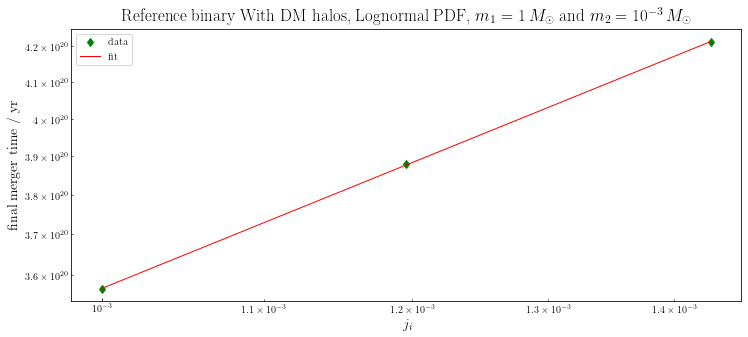

In [31]:
plt.figure(figsize = (12, 5))

x  = (j0_ref_list_1[0], j0_ref_list_1[1], j0_ref_list_1[2] )
y  = (tm_ref_list_1[0], tm_ref_list_1[1], tm_ref_list_1[2])

plt.loglog(x,y,'gd',  label='data')

p = np.polyfit(np.log(x),np.log(y),1)  # F(x) = (x**m)(10**b) with m = slope, b = intercept.
z = np.polyval(p,np.log(x))
plt.loglog(x, np.exp(z), 'r',  label='fit')
print("Slope and intercept of fitting function =", p) 

plt.xlabel('$j_{i}$', fontsize = 14)
plt.ylabel('final merger time / yr', fontsize = 14)
plt.title('Reference binary With DM halos, Lognormal PDF, $m_{1} = 1 \, M_{\odot}$ and $m_{2}= 10^{-3} \,  M_{\odot}$ ', fontsize = 17, pad = 9)
plt.legend()
plt.show()


# So, the fitting function is t_final_mergertime = (10**50.54) * (j0**0.465).

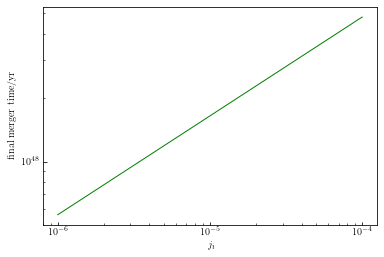

j0_lower_values = [1e-06, 1.6681005372000591e-06, 2.782559402207126e-06, 4.641588833612782e-06, 7.742636826811277e-06, 1.2915496650148827e-05, 2.1544346900318823e-05, 3.5938136638046256e-05, 5.994842503189409e-05, 0.0001]

final merger time / yr = [5.62341325e+47 7.13400375e+47 9.05037692e+47 1.14815362e+48
 1.45657662e+48 1.84784980e+48 2.34422882e+48 2.97394775e+48
 3.77282505e+48 4.78630092e+48]


In [32]:
j0_array_3 = np.geomspace(1e-6, 1e-4, 10)

j0_ref_list_3 = j0_array_3.tolist()

def t_final_merger(j0):
    return  (10**50.54) * (j0**0.465)
    
tm_ref_list_3 = np.zeros(len(j0_ref_list_3))

for i, j0 in enumerate(j0_ref_list_3):
    tm_ref_list_3[i] = t_final_merger(j0)
    

    

plt.loglog(j0_ref_list_3, tm_ref_list_3, 'g')
plt.xlabel('$j_{i}$')
plt.ylabel('final merger time/yr')
plt.show()


print("j0_lower_values =", j0_ref_list_3)
print('\v')
print("final merger time / yr =", tm_ref_list_3)


file = np.load('tmofjo_1_Lgnmlhalo_1.npz')
ji_ref_list_1 = file['arr_0']
tm_ref_list_1 = file['arr_1']


file = np.load('tmofjo_2_Lgnmlhalo_1.npz')
ji_ref_list_2 = file['arr_0']
tm_ref_list_2 = file['arr_1']



j_initial_list = j0_ref_list_1 + j0_ref_list_2 + j0_ref_list_3


t_1 =  np.append(tm_ref_list_1, tm_ref_list_2) 

t_final_list = np.append(t_1, tm_ref_list_3 )

a_initial = 4.5182e+17   # in units of pc


a_i_ref_Lgnmlhalo_1 = a_initial 

np.savez("tm_ofj0_Lgnmlhalo_1", a_i_ref_Lgnmlhalo_1, j_initial_list,  t_final_list)

a_initial=  2.6480287620025294e-05
Evolving from  9.194544312508784e+18  to  1.0 r_isco  with initial eccentricity 0.999999499999875  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08


/home/pratibhajangra/Desktop/Work/imripy-main/src/imripy/inspiral.py:534: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  t_coal = t_coal * 48./19. / g(e_0)**4 * quad(lambda e: g(e)**4 *(1-e**2)**(5./2.) /e/(1. + 121./304. * e**2), 0., e_0, limit=100)[0]   # The inspiral time according to Maggiore (2007)
/home/pratibhajangra/Desktop/Work/imripy-main/src/imripy/inspiral.py:335: RuntimeWarning: invalid value encountered in sqrt
  v_s = np.sqrt(sp.m_total(a) *(2./r - 1./a))
/home/pratibhajangra/Desktop/Work/imripy-main/src/imripy/halo.py:321: RuntimeWarning: invalid value encountered in double_scalars
  return np.where(r > self.r_min, self.rho_spike * (self.r_spike/r)**self.alpha, 0.)
/home/pratibhajangra/Desktop/Work/imripy-main/src/imripy/inspiral.py:337: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return -(1.-e**2)**(3./2.)/2./np.pi

Required step size is less than spacing between numbers.
 -> Evolution took 3.4282s
here
Evolving from  9.194544312508784e+18  to  1.0 r_isco  with initial eccentricity 0.9999992850151702  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 3.7828s
here
Evolving from  9.194544312508784e+18  to  1.0 r_isco  with initial eccentricity 0.9999989775935948  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 4.0942s
here
Evolving from  9.194544312508784e+18  to  1.0 r_isco  with initial eccentricity 0.9999985379900622  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 3.3450s
here
Evolving from  9.194544312508784e+18  to  1.0 r_isco  with initial eccentricity 

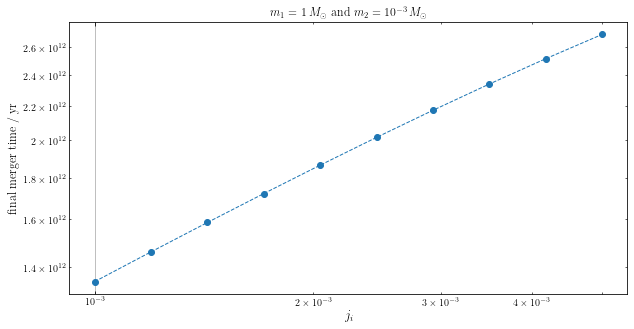

In [21]:
# Final merger time for the reference systems as a function of the initial 
# angular momentum j0 for binaries witho M halos having Power Law PDF 
# in the PBH  mass range of 1e-3 - 100 solar mass.



# Definition of the reference binary system with m_1 = 1 M☉ and m_2 = 1e-3 M☉.
bin_centres = np.geomspace(1e-3, 1, 5)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])


ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 


deltas = np.diff(bin_edges)
Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()

m_1 = np.geomspace(1e-3, 1, 5)
m_2 = np.geomspace(1e-3, 1, 5)
m_1_list = m_1.tolist()
m_2_list = m_2.tolist()   

    

    
def a(m_1,m_2,Δ_1,Δ_2):  # for x = x_bar 
    
    f_pbh = 1.18
    f = 0.85 * f_pbh
        
          
    def P(m): #Powerlaw PBH mass distribution
        α = 1.6
        M = 1e-3     #in units of M☉
        return ((α-1)/M) * ((m/M)**(-α))

    
    def f_(m):
        return f*P(m)
    
    def f_b(m_1,m_2):
        return  f_(m_1)+f_(m_2)
    
    def x̄(m_1,m_2,Δ_1,Δ_2):
        return (((3*(m_1+m_2))/(8*π*ρ_eq*f_b(m_1,m_2)*np.sqrt(Δ_1*Δ_2)))**(1/3))
   
    def λ(m_1,m_2,Δ_1,Δ_2):
        return (8*π*ρ_eq*(x̄(m_1,m_2,Δ_1,Δ_2)**3))/(3*(m_1 + m_2))

    
    return (0.0977*λ(m_1,m_2,Δ_1,Δ_2) + 0.0057*(λ(m_1,m_2,Δ_1,Δ_2)**2) ) * x̄(m_1,m_2,Δ_1,Δ_2)





a_initial = a(m_1_list[-1], m_2_list[0], Δ_1_list[-1], Δ_2_list[0])


print("a_initial= ", a_initial)


# Setting initial and final conditions of the binary evolution for an eccentric orbit
a_i_ref = a_initial * 1e11
j0_array = np.geomspace(1e-3, 5e-3, 10)
j0_ref_list_1 = j0_array.tolist()





plt.figure(figsize = (10, 5))
plt.rc('lines', linewidth=1)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(which='both', right=True, top=True)






tm_ref_list_1 = np.zeros(len(j0_ref_list_1))
T_list = np.zeros(len(j0_ref_list_1))


for k, j0 in enumerate (j0_ref_list_1):
    m_bar = 1
    m1 =  m_bar * ms.solar_mass_to_pc  
    m2 = 1e-3 * ms.solar_mass_to_pc   
    D_luminosity = 5e8              
    ρ_bar = (ρ_eq/2) * (t_eq**(3/2)) * ((2 * G * m_bar)**(3/4))   
    r_spike = 1  # in parsecs, Choosen by choice
    alpha = 9/4
    rho_spike =  ρ_bar * (r_spike**(-alpha)) * ms.solar_mass_to_pc  
    spike = imripy.halo.Spike(rho_spike, r_spike, alpha)
    sp = ms.SystemProp(m1, m2, spike, D_luminosity)
    a_fin = sp.r_isco()      # Choosen equal to r_icso
    R_fin = sp.r_isco()      # The final condition for the evolution
    e0 = np.sqrt(1 -(j0**2))
    
    
    m_2_ref = 1 # in units of solar mass
    T = 1e-5 * (t_m * ms.year_to_pc ) * ((m2/m_2_ref)**(-1))
    
    ev_ecc = imripy.inspiral.Classic.Evolve(sp, a_i_ref , e0,  a_fin = R_fin, t_fin = T)
    tm = ev_ecc.t[-1]
    
    print("here")
    while np.isclose(T, tm) == True: 
        T = T * 1000
        ev_ecc = imripy.inspiral.Classic.Evolve(sp, a_i_ref, e0,  a_fin = R_fin, t_fin = T)
        tm = ev_ecc.t[-1]
        
            
            
    tm_ref_list_1[k] = tm/ms.year_to_pc
    T_list[k] =  T/ms.year_to_pc
      
    
   
   
    
    np.savez("tmofjo_1_PWRhalo_2",  j0_ref_list_1,  tm_ref_list_1)

    
    
plt.loglog(j0_ref_list_1, tm_ref_list_1, '--o')


print(tm_ref_list_1)
    

plt.xlabel('$j_{i}$', fontsize = 13)
plt.ylabel('final merger time / yr', fontsize = 12)
plt.title('$m_{1} = 1 \, M_{\odot}$ and $m_{2}= 10^{-3} \,  M_{\odot}$ ')
plt.grid()
plt.show()

a_initial=  2.6480287620025294e-05
Evolving from  9.194544312508784e+18  to  1.0 r_isco  with initial eccentricity 0.9999869949154339  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08


/home/pratibhajangra/Desktop/Work/imripy-main/src/imripy/inspiral.py:335: RuntimeWarning: invalid value encountered in sqrt
  v_s = np.sqrt(sp.m_total(a) *(2./r - 1./a))
/home/pratibhajangra/Desktop/Work/imripy-main/src/imripy/halo.py:321: RuntimeWarning: invalid value encountered in double_scalars
  return np.where(r > self.r_min, self.rho_spike * (self.r_spike/r)**self.alpha, 0.)
/home/pratibhajangra/Desktop/Work/imripy-main/src/imripy/inspiral.py:337: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return -(1.-e**2)**(3./2.)/2./np.pi * quad(integrand, 0., 2.*np.pi, limit = 100)[0]
/home/pratibhajangra/Desktop/Work/imripy-main/src/imripy/inspiral.py:172: RuntimeWarning: invalid value encountered in double_scalars
  return -32./5. * sp.m_reduced(a)**2 * sp.m_total(a)**(5./2.) / a**(7./2.)  / (1. - e**2)**2 * (1. + 7./8.*e**2)
/home/pratibhajangra/Desktop/Work/imripy-

Required step size is less than spacing between numbers.
 -> Evolution took 3.4779s
here
Evolving from  9.194544312508784e+18  to  1.0 r_isco  with initial eccentricity 0.9999579710700719  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 3.0421s
here
Evolving from  9.194544312508784e+18  to  1.0 r_isco  with initial eccentricity 0.9998641694208956  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 3.3140s
here
Evolving from  9.194544312508784e+18  to  1.0 r_isco  with initial eccentricity 0.9995609719689087  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 3.5896s
here
Evolving from  9.194544312508784e+18  to  1.0 r_isco  with initial eccentricity 

/home/pratibhajangra/Desktop/Work/imripy-main/src/imripy/merger_system.py:202: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((self.mass(r) + self.m2)/r**3)
/tmp/ipykernel_114300/2684569799.py:134: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbon_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('tm_refvsj_i_ref.pdf', bbon_inches = 'tight')


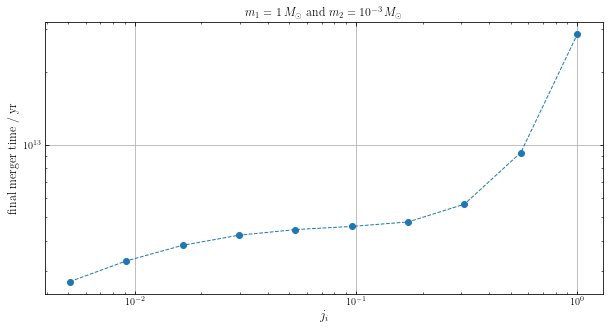

In [22]:
# Definition of the reference binary system with m_1 = 1 M☉ and m_2 = 1e-3 M☉.
bin_centres = np.geomspace(1e-3, 1, 5)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])


ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 


deltas = np.diff(bin_edges)
Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()

m_1 = np.geomspace(1e-3, 1, 5)
m_2 = np.geomspace(1e-3, 1, 5)
m_1_list = m_1.tolist()
m_2_list = m_2.tolist()   
   

    
def a(m_1,m_2,Δ_1,Δ_2):  # for x = x_bar 
    
    f_pbh = 1.18
    f = 0.85 * f_pbh
        
          
    def P(m): #Powerlaw PBH mass distribution
        α = 1.6
        M = 1e-3     #in units of M☉
        return ((α-1)/M) * ((m/M)**(-α))

    
    def f_(m):
        return f*P(m)
    
    def f_b(m_1,m_2):
        return  f_(m_1)+f_(m_2)
    
    def x̄(m_1,m_2,Δ_1,Δ_2):
        return (((3*(m_1+m_2))/(8*π*ρ_eq*f_b(m_1,m_2)*np.sqrt(Δ_1*Δ_2)))**(1/3))
   
    def λ(m_1,m_2,Δ_1,Δ_2):
        return (8*π*ρ_eq*(x̄(m_1,m_2,Δ_1,Δ_2)**3))/(3*(m_1 + m_2))

    
    return (0.0977*λ(m_1,m_2,Δ_1,Δ_2) + 0.0057*(λ(m_1,m_2,Δ_1,Δ_2)**2) ) * x̄(m_1,m_2,Δ_1,Δ_2)





a_initial = a(m_1_list[-1], m_2_list[0], Δ_1_list[-1], Δ_2_list[0])


print("a_initial= ", a_initial)


# Setting initial and final conditions of the binary evolution for an eccentric orbit
a_i_ref = a_initial * 1e11
j0_array = np.geomspace(5.1e-3, 1, 10)
j0_ref_list_2 = j0_array.tolist()





plt.figure(figsize = (10, 5))
plt.rc('lines', linewidth=1)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(which='both', right=True, top=True)






tm_ref_list_2 = np.zeros(len(j0_ref_list_2))
T_list = np.zeros(len(j0_ref_list_2))


for k, j0 in enumerate (j0_ref_list_2):
    m_bar = 1
    m1 =  m_bar * ms.solar_mass_to_pc  
    m2 = 1e-3 * ms.solar_mass_to_pc   
    D_luminosity = 5e8              
    ρ_bar = (ρ_eq/2) * (t_eq**(3/2)) * ((2 * G * m_bar)**(3/4))   
    r_spike = 1  # in parsecs, Choosen by choice
    alpha = 9/4
    rho_spike =  ρ_bar * (r_spike**(-alpha)) * ms.solar_mass_to_pc  
    spike = imripy.halo.Spike(rho_spike, r_spike, alpha)
    sp = ms.SystemProp(m1, m2, spike, D_luminosity)
    a_fin = sp.r_isco()      # Choosen equal to r_icso
    R_fin = sp.r_isco()      # The final condition for the evolution
    e0 = np.sqrt(1 -(j0**2))
    
    
    m_2_ref = 1 # in units of solar mass
    T = 1e-5 * (t_m * ms.year_to_pc ) * ((m2/m_2_ref)**(-1))
    
    ev_ecc = imripy.inspiral.Classic.Evolve(sp, a_i_ref , e0,  a_fin = R_fin, t_fin = T)
    tm = ev_ecc.t[-1]
    
    print("here")
    while np.isclose(T, tm) == True: 
        T = T * 1000
        ev_ecc = imripy.inspiral.Classic.Evolve(sp, a_i_ref, e0,  a_fin = R_fin, t_fin = T)
        tm = ev_ecc.t[-1]
        
            
            
    tm_ref_list_2[k] = tm/ms.year_to_pc
    T_list[k] =  T/ms.year_to_pc
      
    
   
   
    
    np.savez("tmofjo_2_PWRhalo_2",  j0_ref_list_2,  tm_ref_list_2)

    
    
plt.loglog(j0_ref_list_2, tm_ref_list_2, '--o')


print(tm_ref_list_2)
    

plt.xlabel('$j_{i}$', fontsize = 13)
plt.ylabel('final merger time / yr', fontsize = 12)
plt.title('$m_{1} = 1 \, M_{\odot}$ and $m_{2}= 10^{-3} \,  M_{\odot}$ ')
plt.grid()
plt.savefig('tm_refvsj_i_ref.pdf', bbon_inches = 'tight')
plt.show()

Slope and intercept of fitting function = [ 0.46493127 31.13818472]


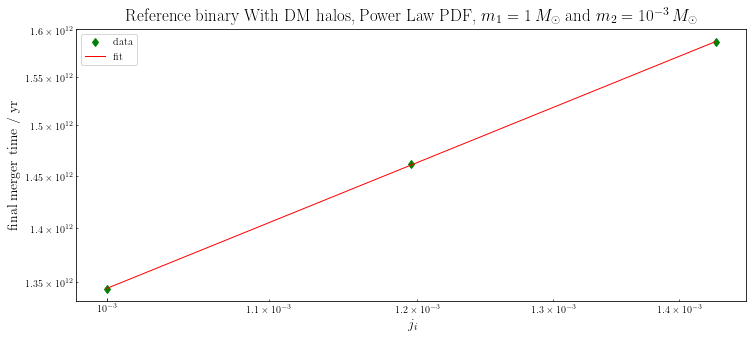

In [23]:
plt.figure(figsize = (12, 5))

x  = (j0_ref_list_1[0], j0_ref_list_1[1], j0_ref_list_1[2] )
y  = (tm_ref_list_1[0], tm_ref_list_1[1], tm_ref_list_1[2])

plt.loglog(x,y,'gd',  label='data')

p = np.polyfit(np.log(x),np.log(y),1)  # F(x) = (x**m)(10**b) with m = slope, b = intercept.
z = np.polyval(p,np.log(x))
plt.loglog(x, np.exp(z), 'r',  label='fit')
print("Slope and intercept of fitting function =", p) 

plt.xlabel('$j_{i}$', fontsize = 14)
plt.ylabel('final merger time / yr', fontsize = 14)
plt.title('Reference binary With DM halos, Power Law PDF, $m_{1} = 1 \, M_{\odot}$ and $m_{2}= 10^{-3} \,  M_{\odot}$ ', fontsize = 17, pad = 9)
plt.legend()
plt.show()


# So, the fitting function is t_final_mergertime = (10**31.14) * (j0**0.465)

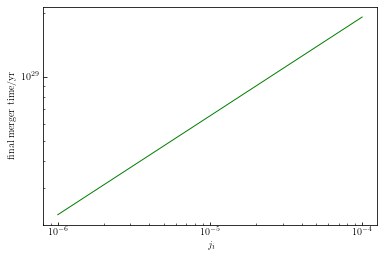

j0_lower_values = [1e-06, 1.6681005372000591e-06, 2.782559402207126e-06, 4.641588833612782e-06, 7.742636826811277e-06, 1.2915496650148827e-05, 2.1544346900318823e-05, 3.5938136638046256e-05, 5.994842503189409e-05, 0.0001]

final merger time / yr = [2.23872114e+28 2.84009805e+28 3.60301995e+28 4.57088190e+28
 5.79873595e+28 7.35642254e+28 9.33254301e+28 1.18394992e+29
 1.50198870e+29 1.90546072e+29]


In [24]:
j0_array_3 = np.geomspace(1e-6, 1e-4, 10)

j0_ref_list_3 = j0_array_3.tolist()

def t_final_merger(j0):
    return  (10**31.14) * (j0**0.465) 
    
tm_ref_list_3 = np.zeros(len(j0_ref_list_3))

for i, j0 in enumerate(j0_ref_list_3):
    tm_ref_list_3[i] = t_final_merger(j0)
    

    
    

plt.loglog(j0_ref_list_3, tm_ref_list_3, 'g')
plt.xlabel('$j_{i}$')
plt.ylabel('final merger time/yr')
plt.show()


print("j0_lower_values =", j0_ref_list_3)
print('\v')
print("final merger time / yr =", tm_ref_list_3)


file = np.load('tmofjo_1_PWRhalo_2.npz')
ji_ref_list_1 = file['arr_0']
tm_ref_list_1 = file['arr_1']


file = np.load('tmofjo_2_PWRhalo_2.npz')
ji_ref_list_2 = file['arr_0']
tm_ref_list_2 = file['arr_1']



j_initial_list = j0_ref_list_1 + j0_ref_list_2 + j0_ref_list_3


t_1 =  np.append(tm_ref_list_1, tm_ref_list_2) 

t_final_list = np.append(t_1, tm_ref_list_3 )

a_initial =  2.6480e-05 # in units of pc


a_i_ref_PWRhalo_2 = a_initial * 1e11

np.savez("tm_ofj0_PWRhalo_2", a_i_ref_PWRhalo_2, j_initial_list,  t_final_list)

a_initial=  2.1718371199603872e+17
Evolving from  7.541101110973567e+29  to  1.0 r_isco  with initial eccentricity 0.999999499999875  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08


/home/pratibhajangra/Desktop/Work/imripy-main/src/imripy/inspiral.py:534: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  t_coal = t_coal * 48./19. / g(e_0)**4 * quad(lambda e: g(e)**4 *(1-e**2)**(5./2.) /e/(1. + 121./304. * e**2), 0., e_0, limit=100)[0]   # The inspiral time according to Maggiore (2007)
/home/pratibhajangra/Desktop/Work/imripy-main/src/imripy/inspiral.py:335: RuntimeWarning: invalid value encountered in sqrt
  v_s = np.sqrt(sp.m_total(a) *(2./r - 1./a))
/home/pratibhajangra/Desktop/Work/imripy-main/src/imripy/halo.py:321: RuntimeWarning: invalid value encountered in double_scalars
  return np.where(r > self.r_min, self.rho_spike * (self.r_spike/r)**self.alpha, 0.)
/home/pratibhajangra/Desktop/Work/imripy-main/src/imripy/inspiral.py:337: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return -(1.-e**2)**(3./2.)/2./np.pi

Required step size is less than spacing between numbers.
 -> Evolution took 3.9164s
here
Evolving from  7.541101110973567e+29  to  1.0 r_isco  with initial eccentricity 0.9999992850151702  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 3.7991s
here
Evolving from  7.541101110973567e+29  to  1.0 r_isco  with initial eccentricity 0.9999989775935948  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 4.1118s
here
Evolving from  7.541101110973567e+29  to  1.0 r_isco  with initial eccentricity 0.9999985379900622  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 4.2710s
here
Evolving from  7.541101110973567e+29  to  1.0 r_isco  with initial eccentricity 

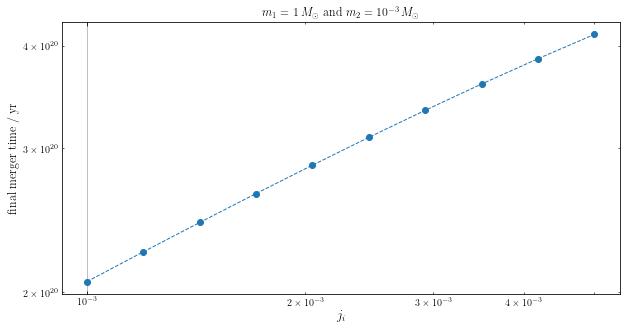

In [25]:

# Final merger time for the reference systems as a function of the initial 
# angular momentum j0 for binaries without DM halos having Lognormal PDF 
# in the PBH  mass range of 1e-3 - 100 solar mass.


# Definition of the reference binary system with m_1 = 1 M☉ and m_2 = 1e-3 M☉.
bin_centres = np.geomspace(1e-3, 1, 5)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])


ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 


deltas = np.diff(bin_edges)
Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()

m_1 = np.geomspace(1e-3, 1, 5)
m_2 = np.geomspace(1e-3, 1, 5)
m_1_list = m_1.tolist()
m_2_list = m_2.tolist()   


    
def a(m_1,m_2,Δ_1,Δ_2):  # for x = x_bar 
    
    f_pbh = 7.20e-4
    f = 0.85 * f_pbh
        
          
    def P(m):                  #Log-Normal PBH mass Distribution
        σ = 0.6
        m_c = 15               #in units of M☉, for PBHs mass range of m_min = 5 M☉ - m_max = 100 M☉ .
        return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-(((np.log(m/m_c))**2)/(2*(σ**2))))

    
    def f_(m):
        return f*P(m)
    
    def f_b(m_1,m_2):
        return  f_(m_1)+f_(m_2)
    
    def x̄(m_1,m_2,Δ_1,Δ_2):
        return (((3*(m_1+m_2))/(8*π*ρ_eq*f_b(m_1,m_2)*np.sqrt(Δ_1*Δ_2)))**(1/3))
   
    def λ(m_1,m_2,Δ_1,Δ_2):
        return (8*π*ρ_eq*(x̄(m_1,m_2,Δ_1,Δ_2)**3))/(3*(m_1 + m_2))

    
    return (0.0977*λ(m_1,m_2,Δ_1,Δ_2) + 0.0057*(λ(m_1,m_2,Δ_1,Δ_2)**2) ) * x̄(m_1,m_2,Δ_1,Δ_2)





a_initial = a(m_1_list[-1], m_2_list[0], Δ_1_list[-1], Δ_2_list[0])


print("a_initial= ", a_initial)


# Setting initial and final conditions of the binary evolution for an eccentric orbit
a_i_ref = a_initial 
j0_array = np.geomspace(1e-3, 5e-3, 10)
j0_ref_list_1 = j0_array.tolist()





plt.figure(figsize = (10, 5))
plt.rc('lines', linewidth=1)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(which='both', right=True, top=True)






tm_ref_list_1 = np.zeros(len(j0_ref_list_1))
T_list = np.zeros(len(j0_ref_list_1))


for k, j0 in enumerate (j0_ref_list_1):
    m_bar = 1
    m1 =  m_bar * ms.solar_mass_to_pc  
    m2 = 1e-3 * ms.solar_mass_to_pc   
    D_luminosity = 5e8              
    ρ_bar = (ρ_eq/2) * (t_eq**(3/2)) * ((2 * G * m_bar)**(3/4))   
    r_spike = 1  # in parsecs, Choosen by choice
    alpha = 9/4
    rho_spike =  ρ_bar * (r_spike**(-alpha)) * ms.solar_mass_to_pc  
    spike = imripy.halo.Spike(rho_spike, r_spike, alpha)
    sp = ms.SystemProp(m1, m2, spike, D_luminosity)
    a_fin = sp.r_isco()      # Choosen equal to r_icso
    R_fin = sp.r_isco()      # The final condition for the evolution
    e0 = np.sqrt(1 -(j0**2))
    
    
    m_2_ref = 1 # in units of solar mass
    T = 1e-5 * (t_m * ms.year_to_pc ) * ((m2/m_2_ref)**(-1))
    
    ev_ecc = imripy.inspiral.Classic.Evolve(sp, a_i_ref , e0,  a_fin = R_fin, t_fin = T)
    tm = ev_ecc.t[-1]
    
    print("here")
    while np.isclose(T, tm) == True: 
        T = T * 1000
        ev_ecc = imripy.inspiral.Classic.Evolve(sp, a_i_ref, e0,  a_fin = R_fin, t_fin = T)
        tm = ev_ecc.t[-1]
        
            
            
    tm_ref_list_1[k] = tm/ms.year_to_pc
    T_list[k] =  T/ms.year_to_pc
      
    
   
   
    
    np.savez("tmofjo_1_Lgnmlhalo_2",  j0_ref_list_1,  tm_ref_list_1)

    
    
plt.loglog(j0_ref_list_1, tm_ref_list_1, '--o')


print(tm_ref_list_1)
    

plt.xlabel('$j_{i}$', fontsize = 13)
plt.ylabel('final merger time / yr', fontsize = 12)
plt.title('$m_{1} = 1 \, M_{\odot}$ and $m_{2}= 10^{-3} \,  M_{\odot}$ ')
plt.grid()
plt.show()

a_initial=  2.1718371199603872e+17
Evolving from  7.541101110973567e+29  to  1.0 r_isco  with initial eccentricity 0.9999869949154339  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08


/home/pratibhajangra/Desktop/Work/imripy-main/src/imripy/inspiral.py:335: RuntimeWarning: invalid value encountered in sqrt
  v_s = np.sqrt(sp.m_total(a) *(2./r - 1./a))
/home/pratibhajangra/Desktop/Work/imripy-main/src/imripy/halo.py:321: RuntimeWarning: invalid value encountered in double_scalars
  return np.where(r > self.r_min, self.rho_spike * (self.r_spike/r)**self.alpha, 0.)
/home/pratibhajangra/Desktop/Work/imripy-main/src/imripy/inspiral.py:337: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return -(1.-e**2)**(3./2.)/2./np.pi * quad(integrand, 0., 2.*np.pi, limit = 100)[0]
/home/pratibhajangra/Desktop/Work/imripy-main/src/imripy/inspiral.py:172: RuntimeWarning: invalid value encountered in double_scalars
  return -32./5. * sp.m_reduced(a)**2 * sp.m_total(a)**(5./2.) / a**(7./2.)  / (1. - e**2)**2 * (1. + 7./8.*e**2)
/home/pratibhajangra/Desktop/Work/imripy-

Required step size is less than spacing between numbers.
 -> Evolution took 4.1943s
here
Evolving from  7.541101110973567e+29  to  1.0 r_isco  with initial eccentricity 0.9999579710700719  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 4.5202s
here
Evolving from  7.541101110973567e+29  to  1.0 r_isco  with initial eccentricity 0.9998641694208956  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 3.6667s
here
Evolving from  7.541101110973567e+29  to  1.0 r_isco  with initial eccentricity 0.9995609719689087  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 4.1541s
here
Evolving from  7.541101110973567e+29  to  1.0 r_isco  with initial eccentricity 

/home/pratibhajangra/Desktop/Work/imripy-main/src/imripy/merger_system.py:202: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((self.mass(r) + self.m2)/r**3)


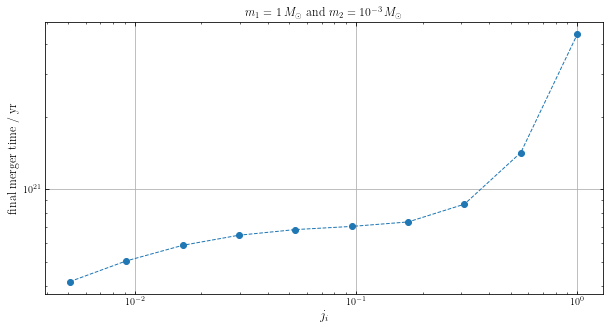

In [26]:

# Final merger time for the reference systems as a function of the initial 
# angular momentum j0 for binaries without DM halos having Lognormal PDF 
# in the PBH  mass range of 1e-3 - 100 solar mass.


# Definition of the reference binary system with m_1 = 1 M☉ and m_2 = 1e-3 M☉.
bin_centres = np.geomspace(1e-3, 1, 5)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])


ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 


deltas = np.diff(bin_edges)
Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()

m_1 = np.geomspace(1e-3, 1, 5)
m_2 = np.geomspace(1e-3, 1, 5)
m_1_list = m_1.tolist()
m_2_list = m_2.tolist()   


    
def a(m_1,m_2,Δ_1,Δ_2):  # for x = x_bar 
    
    f_pbh = 7.20e-4
    f = 0.85 * f_pbh
        
          
    def P(m):                  #Log-Normal PBH mass Distribution
        σ = 0.6
        m_c = 15               #in units of M☉, for PBHs mass range of m_min = 5 M☉ - m_max = 100 M☉ .
        return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-(((np.log(m/m_c))**2)/(2*(σ**2))))

    
    def f_(m):
        return f*P(m)
    
    def f_b(m_1,m_2):
        return  f_(m_1)+f_(m_2)
    
    def x̄(m_1,m_2,Δ_1,Δ_2):
        return (((3*(m_1+m_2))/(8*π*ρ_eq*f_b(m_1,m_2)*np.sqrt(Δ_1*Δ_2)))**(1/3))
   
    def λ(m_1,m_2,Δ_1,Δ_2):
        return (8*π*ρ_eq*(x̄(m_1,m_2,Δ_1,Δ_2)**3))/(3*(m_1 + m_2))

    
    return (0.0977*λ(m_1,m_2,Δ_1,Δ_2) + 0.0057*(λ(m_1,m_2,Δ_1,Δ_2)**2) ) * x̄(m_1,m_2,Δ_1,Δ_2)





a_initial = a(m_1_list[-1], m_2_list[0], Δ_1_list[-1], Δ_2_list[0])


print("a_initial= ", a_initial)


# Setting initial and final conditions of the binary evolution for an eccentric orbit
a_i_ref = a_initial 
j0_array = np.geomspace(5.1e-3, 1, 10)
j0_ref_list_2 = j0_array.tolist()





plt.figure(figsize = (10, 5))
plt.rc('lines', linewidth=1)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(which='both', right=True, top=True)






tm_ref_list_2 = np.zeros(len(j0_ref_list_2))
T_list = np.zeros(len(j0_ref_list_2))


for k, j0 in enumerate (j0_ref_list_2):
    m_bar = 1
    m1 =  m_bar * ms.solar_mass_to_pc  
    m2 = 1e-3 * ms.solar_mass_to_pc   
    D_luminosity = 5e8              
    ρ_bar = (ρ_eq/2) * (t_eq**(3/2)) * ((2 * G * m_bar)**(3/4))   
    r_spike = 1  # in parsecs, Choosen by choice
    alpha = 9/4
    rho_spike =  ρ_bar * (r_spike**(-alpha)) * ms.solar_mass_to_pc  
    spike = imripy.halo.Spike(rho_spike, r_spike, alpha)
    sp = ms.SystemProp(m1, m2, spike, D_luminosity)
    a_fin = sp.r_isco()      # Choosen equal to r_icso
    R_fin = sp.r_isco()      # The final condition for the evolution
    e0 = np.sqrt(1 -(j0**2))
    
    
    m_2_ref = 1 # in units of solar mass
    T = 1e-5 * (t_m * ms.year_to_pc ) * ((m2/m_2_ref)**(-1))
    
    ev_ecc = imripy.inspiral.Classic.Evolve(sp, a_i_ref , e0,  a_fin = R_fin, t_fin = T)
    tm = ev_ecc.t[-1]
    
    print("here")
    while np.isclose(T, tm) == True: 
        T = T * 1000
        ev_ecc = imripy.inspiral.Classic.Evolve(sp, a_i_ref, e0,  a_fin = R_fin, t_fin = T)
        tm = ev_ecc.t[-1]
        
            
            
    tm_ref_list_2[k] = tm/ms.year_to_pc
    T_list[k] =  T/ms.year_to_pc
      
    
   
   
    
    np.savez("tmofjo_2_Lgnmlhalo_2",  j0_ref_list_2,  tm_ref_list_2)

    
    
plt.loglog(j0_ref_list_2, tm_ref_list_2, '--o')


print(tm_ref_list_2)
    

plt.xlabel('$j_{i}$', fontsize = 13)
plt.ylabel('final merger time / yr', fontsize = 12)
plt.title('$m_{1} = 1 \, M_{\odot}$ and $m_{2}= 10^{-3} \,  M_{\odot}$ ')
plt.grid()
plt.show()

Slope and intercept of fitting function = [ 0.46493175 49.98583347]


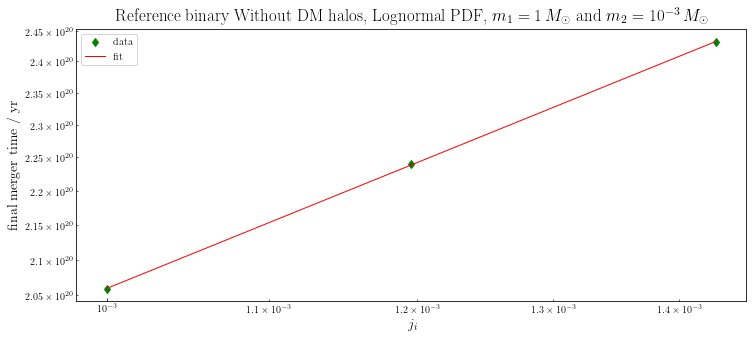

In [27]:
plt.figure(figsize = (12, 5))

x  = (j0_ref_list_1[0], j0_ref_list_1[1], j0_ref_list_1[2] )
y  = (tm_ref_list_1[0], tm_ref_list_1[1], tm_ref_list_1[2])

plt.loglog(x,y,'gd',  label='data')

p = np.polyfit(np.log(x), np.log(y),1)  # F(x) = (x**m)(10**b) with m = slope, b = intercept.
z = np.polyval(p, np.log(x))
plt.loglog(x, np.exp(z), 'r',  label='fit')
print("Slope and intercept of fitting function =", p) 

plt.xlabel('$j_{i}$', fontsize = 14)
plt.ylabel('final merger time / yr', fontsize = 14)
plt.title('Reference binary Without DM halos, Lognormal PDF, $m_{1} = 1 \, M_{\odot}$ and $m_{2}= 10^{-3} \,  M_{\odot}$ ', fontsize = 17, pad = 9)
plt.legend()
plt.savefig('2hLgextrapolate.pdf', bbox_inches = 'tight')
plt.show()


# So, the fitting function is t_final_mergertime = (10**49.99) * (j0**0.465) 

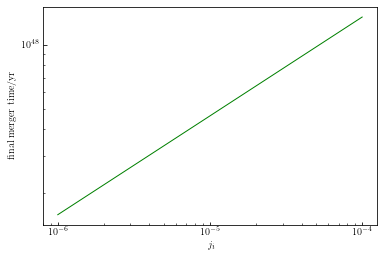

j0_lower_values = [1e-06, 1.6681005372000591e-06, 2.782559402207126e-06, 4.641588833612782e-06, 7.742636826811277e-06, 1.2915496650148827e-05, 2.1544346900318823e-05, 3.5938136638046256e-05, 5.994842503189409e-05, 0.0001]

final merger time / yr = [1.58489319e+47 2.01063544e+47 2.55074278e+47 3.23593657e+47
 4.10519067e+47 5.20794833e+47 6.60693448e+47 8.38172356e+47
 1.06332657e+48 1.34896288e+48]


In [28]:
j0_array_3 = np.geomspace(1e-6, 1e-4, 10)

j0_ref_list_3 = j0_array_3.tolist()

def t_final_merger(j0):
    return  (10**49.99) * (j0**0.465)
    
tm_ref_list_3 = np.zeros(len(j0_ref_list_3))

for i, j0 in enumerate(j0_ref_list_3):
    tm_ref_list_3[i] = t_final_merger(j0)
    

    
    
np.savez("tmofjo_3_Lgnml_1",  j0_ref_list_3,  tm_ref_list_3)
plt.loglog(j0_ref_list_3, tm_ref_list_3, 'g')
plt.xlabel('$j_{i}$')
plt.ylabel('final merger time/yr')
plt.show()


print("j0_lower_values =", j0_ref_list_3)
print('\v')
print("final merger time / yr =", tm_ref_list_3)


file = np.load('tmofjo_1_Lgnmlhalo_2.npz')
ji_ref_list_1 = file['arr_0']
tm_ref_list_1 = file['arr_1']


file = np.load('tmofjo_2_Lgnmlhalo_2.npz')
ji_ref_list_2 = file['arr_0']
tm_ref_list_2 = file['arr_1']



j_initial_list = j0_ref_list_1 + j0_ref_list_2 + j0_ref_list_3


t_1 =  np.append(tm_ref_list_1, tm_ref_list_2) 

t_final_list = np.append(t_1, tm_ref_list_3 )

a_initial = 2.1718e+17   # in units of pc


a_i_ref_Lgnmlhalo_2 = a_initial 

np.savez("tm_ofj0_Lgnmlhalo_2", a_i_ref_Lgnmlhalo_2, j_initial_list,  t_final_list)